--- Planificare RDT ---
Fiabilitate țintă: 95.0%
Nivel de încredere: 90.0%
Eșecuri permise: 0
🚀 Dimensiunea eșantionului necesară: 45 unități


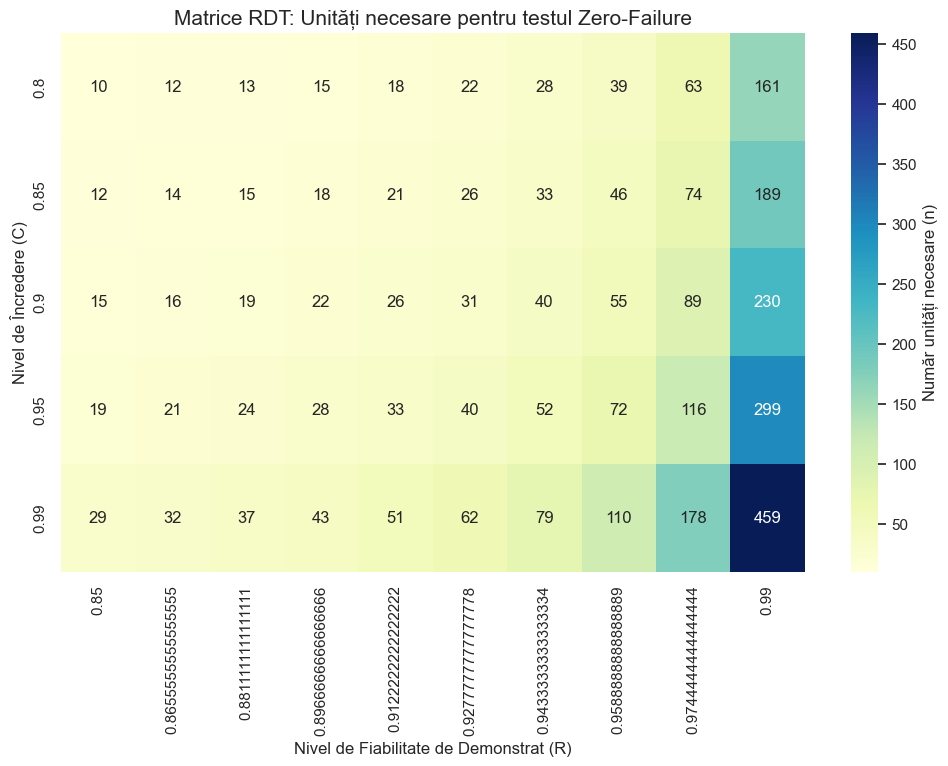

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom

# Setăm stilul vizual
sns.set_theme(style="whitegrid")

def calculate_sample_size(reliability, confidence, failures=0):
    """
    Calculează numărul de unități necesare (n) pentru a demonstra 
    o fiabilitate (R) la un nivel de încredere (C) cu un număr dat de eșecuri permise.
    """
    n = np.log(1 - confidence) / np.log(reliability)
    return int(np.ceil(n))

# 1. Parametrii de demonstrație
target_reliability = 0.95  # Vrem să demonstrăm că 95% din unități rezistă
confidence_level = 0.90    # Vrem să fim 90% siguri de rezultat
max_failures = 0           # Test de tip "Zero-Failure"

n_required = calculate_sample_size(target_reliability, confidence_level, max_failures)

print(f"--- Planificare RDT ---")
print(f"Fiabilitate țintă: {target_reliability*100}%")
print(f"Nivel de încredere: {confidence_level*100}%")
print(f"Eșecuri permise: {max_failures}")
print(f"🚀 Dimensiunea eșantionului necesară: {n_required} unități")

# 2. Generarea unei matrice de risc (Trade-off între Încredere și Fiabilitate)
r_range = np.linspace(0.85, 0.99, 10)
c_range = [0.80, 0.85, 0.90, 0.95, 0.99]

results = []
for c in c_range:
    for r in r_range:
        n = calculate_sample_size(r, c)
        results.append({'Încredere': c, 'Fiabilitate': r, 'Eșantion': n})

df_plot = pd.DataFrame(results)
df_pivot = df_plot.pivot(index='Încredere', columns='Fiabilitate', values='Eșantion')

# 3. Vizualizarea cu Seaborn
plt.figure(figsize=(12, 7))
sns.heatmap(df_pivot, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Număr unități necesare (n)'})
plt.title('Matrice RDT: Unități necesare pentru testul Zero-Failure', fontsize=15)
plt.ylabel('Nivel de Încredere (C)')
plt.xlabel('Nivel de Fiabilitate de Demonstrat (R)')
plt.show()

Reliability Demonstration Testing are un scop, acesta este un test de tip "Succes/Eșec" folosit pentru a demonstra cu dovezi statistice că un produs atinge un anumit nivel de fiabilitate înainte de a fi lansat pe piață. Cel mai utilizat model pentru RDT este Testul Binomial Zero-Failure, unde calculăm de câte unități avem nevoie pentru a rula testul fără nicio defecțiune pentru a demonstra o fiabilitate $R$ cu un nivel de încredere $C$.

Logica de bază: Dacă testezi 45 de unități (conform exemplului de 95%/90%) pentru o perioadă de timp și niciuna nu se strică, poți afirma statistic: "Sunt 90% sigur că acest produs are o fiabilitate de cel puțin 95%".

Relația de cost: Observă în Heatmap cum, pe măsură ce vrei să demonstrezi o fiabilitate mai mare (spre 99%), numărul de unități necesare explodează. Aceasta este bariera de cost în testarea calității.